# DATA PIPELINE

In [1]:
import io
import csv
import json
import requests
import pandas as pd
import urllib.request
from bs4 import BeautifulSoup
from sqlalchemy import create_engine

### CSV 

In [2]:
def extract_csv(url, filename):
    urllib.request.urlretrieve(url, filename)
    with open(filename, "r") as f:
        reader = csv. DictReader(f)
        data = [row for row in reader]
    return data

url = "https://people.sc.fsu.edu/~jburkardt/data/csv/mlb_players.csv"
filename = "mlb_players.csv"
players = extract_csv(url, filename)
players

[{'Name': 'Adam Donachie',
  ' "Team"': ' "BAL"',
  ' "Position"': ' "Catcher"',
  ' "Height(inches)"': ' 74',
  ' "Weight(lbs)"': ' 180',
  ' "Age"': ' 22.99'},
 {'Name': 'Paul Bako',
  ' "Team"': ' "BAL"',
  ' "Position"': ' "Catcher"',
  ' "Height(inches)"': ' 74',
  ' "Weight(lbs)"': ' 215',
  ' "Age"': ' 34.69'},
 {'Name': 'Ramon Hernandez',
  ' "Team"': ' "BAL"',
  ' "Position"': ' "Catcher"',
  ' "Height(inches)"': ' 72',
  ' "Weight(lbs)"': ' 210',
  ' "Age"': ' 30.78'},
 {'Name': 'Kevin Millar',
  ' "Team"': ' "BAL"',
  ' "Position"': ' "First Baseman"',
  ' "Height(inches)"': ' 72',
  ' "Weight(lbs)"': ' 210',
  ' "Age"': ' 35.43'},
 {'Name': 'Chris Gomez',
  ' "Team"': ' "BAL"',
  ' "Position"': ' "First Baseman"',
  ' "Height(inches)"': ' 73',
  ' "Weight(lbs)"': ' 188',
  ' "Age"': ' 35.71'},
 {'Name': 'Brian Roberts',
  ' "Team"': ' "BAL"',
  ' "Position"': ' "Second Baseman"',
  ' "Height(inches)"': ' 69',
  ' "Weight(lbs)"': ' 176',
  ' "Age"': ' 29.39'},
 {'Name': 'Mig

### JSON

In [3]:
def extract_from_json(url, filename):
    urllib.request.urlretrieve(url, filename)
    with open(filename, "r") as f:
        data = json.load(f)
    return data

url = "https://api.open-meteo.com/v1/forecast?latitude=-6.1751&longitude=106.8650&hourly=temperature_2m"
filename = "weather_forecast.json"
data_weather = extract_from_json(url, filename)
data_weather

{'latitude': -6.125,
 'longitude': 106.875,
 'generationtime_ms': 0.025033950805664062,
 'utc_offset_seconds': 0,
 'timezone': 'GMT',
 'timezone_abbreviation': 'GMT',
 'elevation': 9.0,
 'hourly_units': {'time': 'iso8601', 'temperature_2m': 'Â°C'},
 'hourly': {'time': ['2024-09-08T00:00',
   '2024-09-08T01:00',
   '2024-09-08T02:00',
   '2024-09-08T03:00',
   '2024-09-08T04:00',
   '2024-09-08T05:00',
   '2024-09-08T06:00',
   '2024-09-08T07:00',
   '2024-09-08T08:00',
   '2024-09-08T09:00',
   '2024-09-08T10:00',
   '2024-09-08T11:00',
   '2024-09-08T12:00',
   '2024-09-08T13:00',
   '2024-09-08T14:00',
   '2024-09-08T15:00',
   '2024-09-08T16:00',
   '2024-09-08T17:00',
   '2024-09-08T18:00',
   '2024-09-08T19:00',
   '2024-09-08T20:00',
   '2024-09-08T21:00',
   '2024-09-08T22:00',
   '2024-09-08T23:00',
   '2024-09-09T00:00',
   '2024-09-09T01:00',
   '2024-09-09T02:00',
   '2024-09-09T03:00',
   '2024-09-09T04:00',
   '2024-09-09T05:00',
   '2024-09-09T06:00',
   '2024-09-09T07:00

### API

In [4]:
def extract_api(url):
    response = requests.get(url)
    response.raise_for_status()
    data = response.json()
    return data

url = "https://api.open-meteo.com/v1/forecast?latitude=-6.1751&longitude=106.8650&current_weather=true"
data_weather = extract_api(url)
data_weather

{'latitude': -6.125,
 'longitude': 106.875,
 'generationtime_ms': 0.05698204040527344,
 'utc_offset_seconds': 0,
 'timezone': 'GMT',
 'timezone_abbreviation': 'GMT',
 'elevation': 9.0,
 'current_weather_units': {'time': 'iso8601',
  'interval': 'seconds',
  'temperature': '°C',
  'windspeed': 'km/h',
  'winddirection': '°',
  'is_day': '',
  'weathercode': 'wmo code'},
 'current_weather': {'time': '2024-09-08T13:15',
  'interval': 900,
  'temperature': 29.1,
  'windspeed': 4.6,
  'winddirection': 72,
  'is_day': 0,
  'weathercode': 1}}

### WEB

In [5]:
page = requests.get("https://ameera.republika.co.id/ekonomi")
soup = BeautifulSoup(page.content, 'html.parser')

list_content_item = soup.find("div", {"class": "container-lit"})
list_result_item = []
for each in list_content_item.findAll("li"):
    data = dict()
    data['title'] = each.text.strip()
    data['link'] = each.a.get('href')
    list_result_item.append(data)

df = pd.DataFrame(list_result_item)
df.head(10)

,title,link
0,"Otomotif - 08 September 2024, 15:33 ...",https://ekonomi.republika.co.id/berita/sjhjsk3...
1,"Finansial - 08 September 2024, 12:00 ...",https://ekonomi.republika.co.id/berita/sjh96t3...
2,"Finansial - 08 September 2024, 11:04 ...",https://ekonomi.republika.co.id/berita/sjh7bu3...
3,"Bisnis - 08 September 2024, 09:40 ...",https://ekonomi.republika.co.id/berita/sjh3fj3...
4,"Finansial - 08 September 2024, 08:33 ...",https://ekonomi.republika.co.id/berita/sjh0b23...
5,"Energi - 08 September 2024, 06:40 ...",https://ekonomi.republika.co.id/berita/sjgv353...
6,"Bisnis - 08 September 2024, 03:52 ...",https://ekonomi.republika.co.id/berita/sjh6yd4...
7,"Finansial - 08 September 2024, 01:15 ...",https://ekonomi.republika.co.id/berita/sjg78t4...
8,"Bisnis - 08 September 2024, 00:21 ...",https://ekonomi.republika.co.id/berita/sjg2zq4...
9,"Bisnis - 08 September 2024, 00:05 ...",https://ekonomi.republika.co.id/berita/sjg4hd4...


### WEB 2

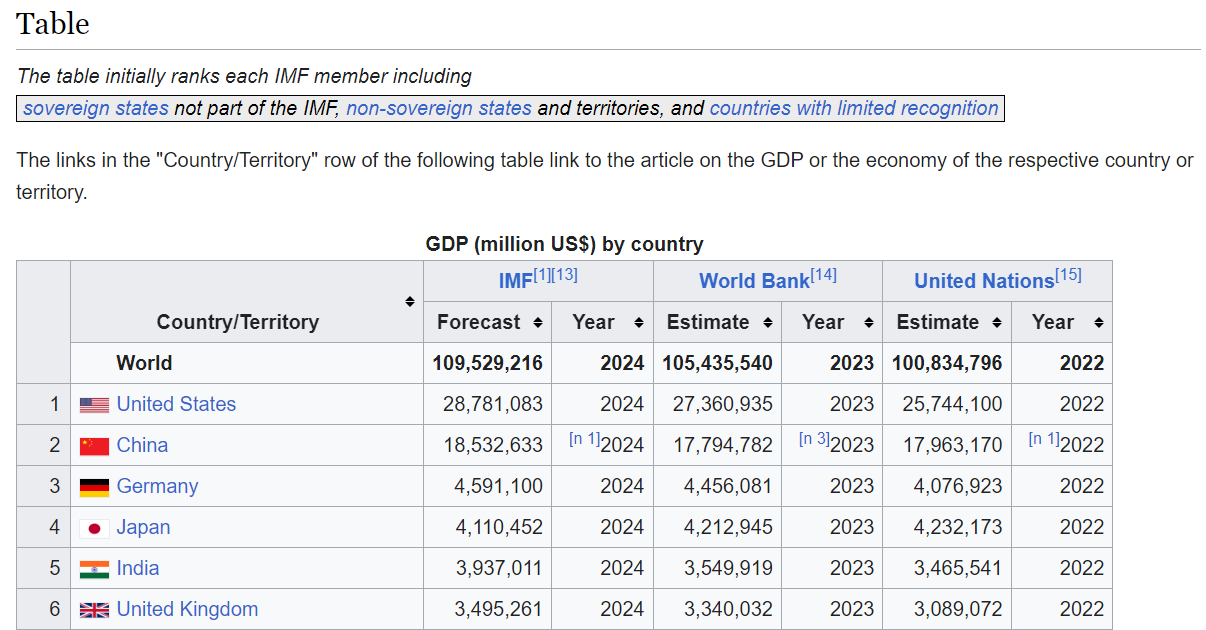

In [6]:
page = requests.get("https://en.wikipedia.org/wiki/List_of_countries_by_GDP_(nominal)")
soup = BeautifulSoup(page.content, 'html.parser')

table = soup.find("table", {"class": "wikitable"})
rows = table.findAll("tr")
row_data = []

for row in rows:
    cell_data = []
    for item in row.findAll(["th", "td"]):
        cell_data.append(item.get_text(strip=True))  
    row_data.append(cell_data)

df_gdp = pd.DataFrame(row_data)
df_gdp.columns = df_gdp.iloc[0]
df_gdp = df_gdp[1:]  
df_gdp = df_gdp.applymap(lambda x: x.replace('\n', '').strip() if isinstance(x, str) else x)
df_gdp.head()

C:\Users\User\AppData\Local\Temp\ipykernel_22268\2216469349.py:17: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df_gdp = df_gdp.applymap(lambda x: x.replace('\n', '').strip() if isinstance(x, str) else x)


,Country/Territory,IMF[1][13],World Bank[14],United Nations[15],None,None,None
1,Forecast,Year,Estimate,Year,Estimate,Year,None
2,World,"109,529,216",2024,"105,435,540",2023,"100,834,796",2022
3,United States,"28,781,083",2024,"27,360,935",2023,"25,744,100",2022
4,China,"18,532,633",[n 1]2024,"17,794,782",[n 3]2023,"17,963,170",[n 1]2022
5,Germany,"4,591,100",2024,"4,456,081",2023,"4,076,923",2022


### MEMORY 

In [7]:
def extract_csv_from_memory(url):
    response = requests.get(url)
    content = response.content.decode("utf-8")
    with io.StringIO(content) as f:
        reader = csv.reader(f)
        data = [row for row in reader]
    return data

url = "https://raw.githubusercontent.com/datasets/country-list/master/data.csv"
data_countries = extract_csv_from_memory(url)
data_countries

[['Name', 'Code'],
 ['Afghanistan', 'AF'],
 ['Åland Islands', 'AX'],
 ['Albania', 'AL'],
 ['Algeria', 'DZ'],
 ['American Samoa', 'AS'],
 ['Andorra', 'AD'],
 ['Angola', 'AO'],
 ['Anguilla', 'AI'],
 ['Antarctica', 'AQ'],
 ['Antigua and Barbuda', 'AG'],
 ['Argentina', 'AR'],
 ['Armenia', 'AM'],
 ['Aruba', 'AW'],
 ['Australia', 'AU'],
 ['Austria', 'AT'],
 ['Azerbaijan', 'AZ'],
 ['Bahamas', 'BS'],
 ['Bahrain', 'BH'],
 ['Bangladesh', 'BD'],
 ['Barbados', 'BB'],
 ['Belarus', 'BY'],
 ['Belgium', 'BE'],
 ['Belize', 'BZ'],
 ['Benin', 'BJ'],
 ['Bermuda', 'BM'],
 ['Bhutan', 'BT'],
 ['Bolivia, Plurinational State of', 'BO'],
 ['Bonaire, Sint Eustatius and Saba', 'BQ'],
 ['Bosnia and Herzegovina', 'BA'],
 ['Botswana', 'BW'],
 ['Bouvet Island', 'BV'],
 ['Brazil', 'BR'],
 ['British Indian Ocean Territory', 'IO'],
 ['Brunei Darussalam', 'BN'],
 ['Bulgaria', 'BG'],
 ['Burkina Faso', 'BF'],
 ['Burundi', 'BI'],
 ['Cambodia', 'KH'],
 ['Cameroon', 'CM'],
 ['Canada', 'CA'],
 ['Cape Verde', 'CV'],
 ['Cayman I

### pandas local

In [8]:
pd.options.display.max_columns = None
def extract_json_from_local_with_pandas(url, filename):
    urllib.request.urlretrieve(url, filename)
    df = pd.read_json(filename)
    return df

url = "https://jsonplaceholder.typicode.com/comments"
filename = "comments.json"
df_comments = extract_json_from_local_with_pandas(url, filename)
df_comments

,postId,id,name,email,body
0,1,1,id labore ex et quam laborum,Eliseo@gardner.biz,laudantium enim quasi est quidem magnam volupt...
1,1,2,quo vero reiciendis velit similique earum,Jayne_Kuhic@sydney.com,est natus enim nihil est dolore omnis voluptat...
2,1,3,odio adipisci rerum aut animi,Nikita@garfield.biz,quia molestiae reprehenderit quasi aspernatur\...
3,1,4,alias odio sit,Lew@alysha.tv,non et atque\noccaecati deserunt quas accusant...
4,1,5,vero eaque aliquid doloribus et culpa,Hayden@althea.biz,harum non quasi et ratione\ntempore iure ex vo...
...,...,...,...,...,...
495,100,496,et occaecati asperiores quas voluptas ipsam no...,Zola@lizzie.com,neque unde voluptatem iure\nodio excepturi ips...
496,100,497,doloribus dolores ut dolores occaecati,Dolly@mandy.co.uk,non dolor consequatur\nlaboriosam ut deserunt ...
497,100,498,dolores minus aut libero,Davion@eldora.net,aliquam pariatur suscipit fugiat eos sunt\nopt...
498,100,499,excepturi sunt cum a et rerum quo voluptatibus...,Wilburn_Labadie@araceli.name,et necessitatibus tempora ipsum quaerat invent...


### SQLAIchemy

In [9]:
pd.options.display.max_columns = None
def extract_sqlite_with_sqlalchemy(url, filename, query):
    urllib.request.urlretrieve(url, filename)
    engine = create_engine(f"sqlite:///{filename}")
    connection = engine.connect().execution_options(stream_results=True)
    df = pd.read_sql(query, connection)
    connection.close()
    engine.dispose()
    return df

url = "https://github.com/djv007/Project-IMDB-database/raw/master/IMDB.sqlite"
filename = "imdb.db"
query = "SELECT * FROM IMDB LIMIT 10" 
df_sqlite = extract_sqlite_with_sqlalchemy(url, filename, query)
df_sqlite

,Movie_id,Title,Rating,TotalVotes,MetaCritic,Budget,Runtime,CVotes10,CVotes09,CVotes08,CVotes07,CVotes06,CVotes05,CVotes04,CVotes03,CVotes02,CVotes01,CVotesMale,CVotesFemale,CVotesU18,CVotesU18M,CVotesU18F,CVotes1829,CVotes1829M,CVotes1829F,CVotes3044,CVotes3044M,CVotes3044F,CVotes45A,CVotes45AM,CVotes45AF,CVotes1000,CVotesUS,CVotesnUS,VotesM,VotesF,VotesU18,VotesU18M,VotesU18F,Votes1829,Votes1829M,Votes1829F,Votes3044,Votes3044M,Votes3044F,Votes45A,Votes45AM,Votes45AF,VotesIMDB,Votes1000,VotesUS,VotesnUS
0,36809,12 Years a Slave (2013),8.1,496092,96,20000000.0,134 min,75556,126223,161460,83070,27231,9603,4021,2420,1785,4739,313823,82012,1837,1363,457,200910,153669,45301,138762,112943,23895,29252,23072,5726,664,53328,224519.0,8.1,8.1,8.4,8.4,8.5,8.2,8.2,8.2,8.0,7.9,8.0,7.8,7.8,8.1,8.0,7.7,8.3,8.0
1,30114,127 Hours (2010),7.6,297075,82,18000000.0,94 min,28939,44110,98845,78451,28394,9403,3796,1930,1161,2059,212866,44600,745,567,170,133336,106007,26152,102120,86609,14304,14895,12400,2261,649,38478,169745.0,7.6,7.6,7.9,7.9,7.9,7.7,7.8,7.7,7.5,7.5,7.5,7.3,7.3,7.5,7.6,7.0,7.7,7.6
2,37367,50/50 (2011),7.7,283935,72,8000000.0,100 min,28304,47501,99524,71485,24252,7545,2381,1109,634,1202,188925,58348,506,348,153,132350,96269,34765,94745,75394,18163,12829,9912,2681,555,46947,147849.0,7.7,7.7,7.9,7.9,7.9,7.8,7.8,7.7,7.6,7.6,7.6,7.4,7.4,7.5,7.4,7.0,7.9,7.6
3,49473,About Time (2013),7.8,225412,,12000000.0,123 min,38556,43170,70850,45487,16542,5673,2210,1084,664,1182,126718,58098,654,325,321,92940,57778,34126,67477,50212,16222,13973,10690,3026,475,20450,111670.0,7.8,7.9,8.2,8.1,8.3,8.0,8.0,8.0,7.6,7.6,7.7,7.6,7.5,7.8,7.7,6.9,7.8,7.7
4,14867,Amour (2012),7.9,76121,94,8900000.0,127 min,11093,15944,22942,14187,5945,2585,1188,710,534,995,49808,16719,121,95,24,28593,20107,8167,28691,21990,6269,7425,5803,1490,391,7959,46138.0,7.8,7.9,8.6,8.7,8.5,8.0,8.0,7.9,7.7,7.7,7.9,7.9,7.8,8.1,6.6,7.2,7.9,7.8
5,33832,Argo (2012),7.7,486840,86,44500000.0,120 min,43875,89490,171495,115165,37332,12630,4992,2910,2020,6941,334838,67910,971,795,162,178794,146371,30643,163795,136391,24948,36215,28817,6752,740,70110,229137.0,7.7,7.9,8.0,8.0,7.8,7.8,7.8,7.9,7.7,7.6,7.8,7.7,7.7,8.0,8.1,7.2,8.0,7.6
6,31722,Arrival (2016),8.0,370842,81,47000000.0,116 min,55533,87850,109536,65440,26913,10556,5057,3083,2194,4734,237437,46272,1943,1544,376,126301,101741,23163,111985,95005,15227,24027,20118,3440,537,42062,163774.0,7.9,8.0,8.6,8.6,8.4,8.2,8.2,8.1,7.8,7.8,7.8,7.6,7.6,7.7,8.3,7.3,8.0,7.9
7,25398,Before Midnight (2013),7.9,106553,94,3000000.0,109 min,16953,22109,31439,19251,8142,3412,1649,1033,826,1745,67076,23823,208,138,66,43312,30016,12857,37072,28401,8189,7479,5891,1470,447,12382,59116.0,7.9,7.8,8.1,8.3,7.4,8.1,8.2,7.9,7.8,7.8,7.6,7.3,7.4,7.2,8.5,7.0,8.0,7.9
8,10099,Big Hero 6 (2014),7.8,315485,74,165000000.0,,50311,61304,103726,65681,22389,6830,2251,1036,539,1439,187383,58731,2446,1571,855,128237,91744,35122,84098,68040,14796,13974,11304,2400,525,36702,131818.0,7.7,8.2,8.2,8.0,8.7,7.9,7.8,8.3,7.7,7.6,8.0,7.6,7.6,7.9,7.9,7.2,7.9,7.7
9,25281,Birdman or (The Unexpected Virtue of Ignorance...,7.8,448725,88,18000000.0,119 min,60209,94476,121637,80828,38373,19161,10116,6750,5378,11807,292808,63310,1891,1538,334,178850,142244,34666,129547,108049,19457,26016,21166,4329,656,52288,203731.0,7.8,7.5,8.5,8.6,7.9,8.0,8.1,7.7,7.6,7.6,7.3,7.2,7.3,7.0,7.8,7.1,7.9,7.7


### ETL

In [10]:
def extract_news(url):
    response = requests.get(url)
    response.raise_for_status() 
    soup = BeautifulSoup(response.content, "html.parser")
    data = [h3.get_text() for h3 in soup.find_all("h3")]
    df = pd.DataFrame(data, columns=["title"])
    return df

def load_sqlite(df, table_name, db_path="sqlite:///news.db"):
    engine = create_engine(db_path)
    with engine.connect() as conn:
        df.to_sql(table_name, conn, index=False, if_exists="replace")

def transform_uppercase(df):
    df['title'] = df['title'].str.upper()
    return df

# New URL for BBC News
url = "https://www.bbc.com/news"
table_name = "news"

df_news = extract_news(url)
print("Extract berhasil")
df_news_transformed = transform_uppercase(df_news)
print("Transform berhasil")
load_sqlite(df_news_transformed, table_name)
print("Load berhasil")

Extract berhasil
Transform berhasil
Load berhasil
